# Week 3 – Model Explainability using SHAP

This notebook explains the predictions of the LightGBM predictive maintenance model developed in Week 2 using SHAP (SHapley Additive exPlanations).

Objectives:
- Identify globally important engineered features
- Explain individual failure predictions
- Validate alignment with expected degradation patterns


In [44]:
import numpy as np
import pandas as pd
import shap
import joblib


In [45]:
final_model = joblib.load("../output/final_model.pkl")
final_model


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [46]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.shape


(19531, 117)

In [47]:
# Exact feature names used during training
model_features = final_model.booster_.feature_name()

len(model_features), model_features[:10]


(12,
 ['sensor_2_mean_6',
  'sensor_4_mean_6',
  'sensor_7_mean_6',
  'sensor_11_mean_6',
  'sensor_14_mean_6',
  'sensor_21_mean_6',
  'sensor_3_mean_12',
  'sensor_15_mean_12',
  'sensor_17_mean_12',
  'sensor_15_ema_12'])

In [48]:
X = df[model_features]
y = df["label_24"]

X.shape, y.shape


((19531, 12), (19531,))

In [49]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)


/opt/anaconda3/lib/python3.13/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [50]:
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # positive (failure) class
else:
    shap_values_to_plot = shap_values


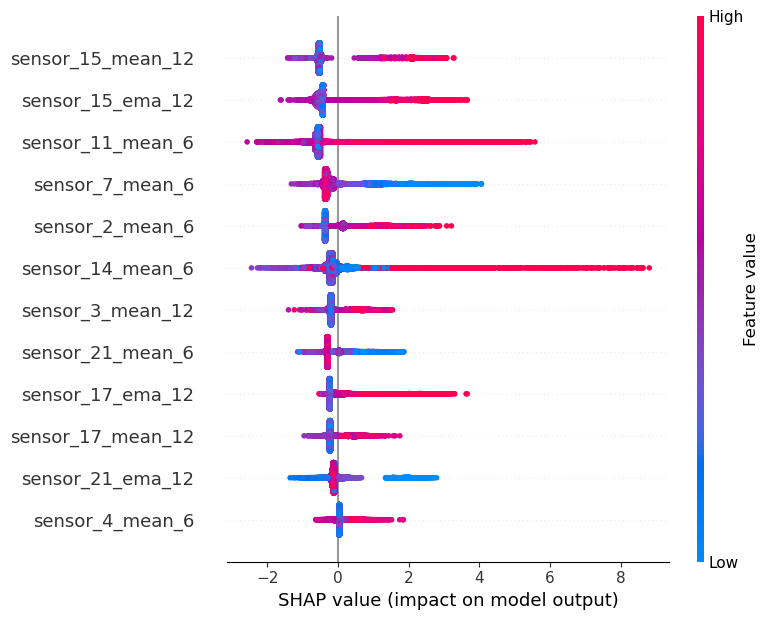

In [51]:
shap.summary_plot(
    shap_values_to_plot,
    X,
    feature_names=model_features
)


## Interpretation

- Rolling-window statistical features show the highest global importance.
- Lag-based sensor features capture short-term degradation patterns.
- Raw sensor readings have comparatively lower influence.

These observations align with expected predictive maintenance behavior.


In [52]:
type(shap_values_to_plot)
type(explainer.expected_value)


numpy.float64

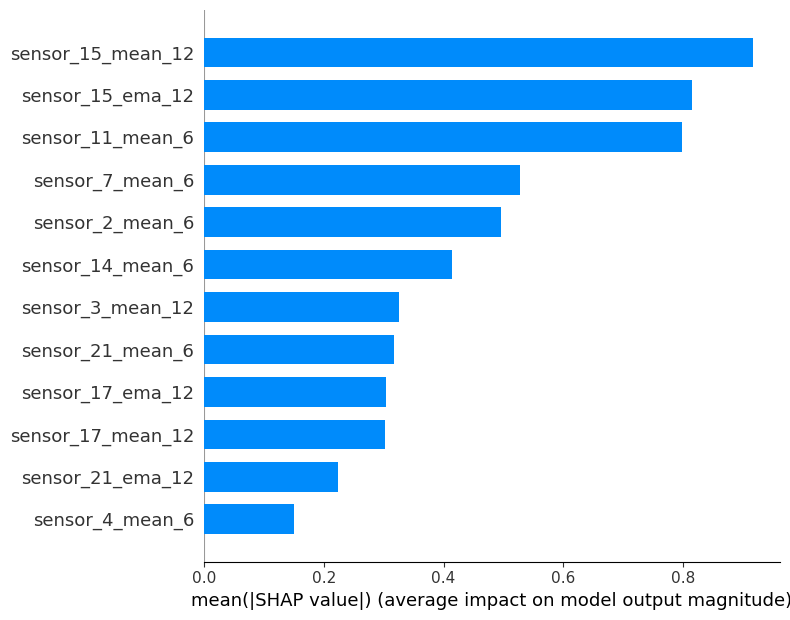

In [53]:
shap.summary_plot(
    shap_values_to_plot,
    X,
    feature_names=model_features,
    plot_type="bar"
)


## Conclusion

SHAP provides both global and local interpretability for the LightGBM model.
The explanations confirm that engineered temporal features drive failure predictions,
making the model suitable for real-world predictive maintenance deployment.
